In [1]:
# pip install xlrd
!pip install openpyxl

In [1]:
#import pandas,file is in excel,the best way to open it was through openpyxl
import pandas as pd
df_main = pd.read_excel("pythonproject1.xlsx", engine='openpyxl', sheet_name='Sheet1')
df_main

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Ldlrad3,2210.746135,1.797380,0.096093,18.704617,4.539810e-78,9.223079e-74
1,Igsf1,635.436952,3.114924,0.179527,17.350723,1.947784e-67,1.978559e-63
2,Tspan15,8619.394798,2.387348,0.138427,17.246199,1.195081e-66,8.093092e-63
3,Agt,9121.808017,3.938808,0.231468,17.016650,6.180729e-65,3.139192e-61
4,Trappc12,4122.262161,-1.379825,0.081887,-16.850276,1.044254e-63,4.243011e-60
...,...,...,...,...,...,...,...
36139,Zscan4c,0.000000,NaN,NaN,NaN,NaN,NaN
36140,Zscan4d,0.000000,NaN,NaN,NaN,NaN,NaN
36141,Zscan4e,0.000000,NaN,NaN,NaN,NaN,NaN
36142,Zscan4f,0.000000,NaN,NaN,NaN,NaN,NaN


In [3]:
#I have RNA seq results so I need the bioinfokit
!pip install bioinfokit

In [5]:
#to do the MA plot(log average ( A ) on the -axis and the log ratio ( M ) on the -axis), I used visuz from bioinfokit. MA shows data distribution between my two groups, green:upregulated and red:downregulated genes
from bioinfokit import visuz
df_main_processed = df_main.dropna()
df_main_processed
visuz.GeneExpression.ma(df=df_main_processed, lfc='log2FoldChange', ct_count='baseMean', st_count='baseMean', pv='pvalue')


In [9]:
#put legends
visuz.GeneExpression.ma(df=df_main_processed, lfc='log2FoldChange', ct_count='baseMean', st_count='baseMean', pv='pvalue', plotlegend=True)

In [8]:
#change colors in the graph
visuz.GeneExpression.ma(df=df_main_processed, lfc='log2FoldChange', ct_count='baseMean', st_count='baseMean', pv='pvalue', color=('#00239CFF', 'grey', '#E10600FF'))

In [10]:
#next question is to observe trends, jumps, clusters and outliers between my control and mutant-experimental sample. 
# PCA (principal component analysis) graph import pandas and PCA from sklearn decomposition
import pandas as pd
from sklearn.decomposition import PCA

In [11]:
#import my data
import pandas as pd
df_vsd = pd.read_csv("DESeq2_kallisto_vsd.csv").dropna()
df_vsd

,Unnamed: 0,JP001,JP002,JP003,JP004,JP005,JP006,JP007,JP008
0,0610009B22Rik,10.425076,10.404924,10.571324,10.524966,9.789004,9.354933,9.291470,9.170668
1,0610010F05Rik,11.681542,11.714794,11.472211,11.454169,10.604382,10.773900,10.918988,11.000997
2,0610010K14Rik,9.891799,9.798628,10.095838,9.964367,10.093656,10.090004,10.118448,10.198606
3,0610012G03Rik,11.820555,11.603109,12.073275,11.905223,11.602196,11.851617,11.753897,11.888843
4,0610030E20Rik,9.875777,9.791588,9.871849,9.678772,10.139646,9.868778,9.375454,10.001971
...,...,...,...,...,...,...,...,...,...
36139,Zyg11a,5.879159,5.879159,5.879159,5.879159,5.879159,5.879159,5.879159,5.879159
36140,Zyg11b,11.998458,12.189784,11.957409,11.948443,11.331173,11.526435,11.469923,11.657189
36141,Zyx,11.474158,11.016714,11.258902,11.350937,11.334157,11.649833,11.480989,11.671542
36142,Zzef1,10.309166,10.235081,10.011170,10.363800,10.560365,10.158212,10.389741,10.063578


In [24]:
#transpose index and columns
df_vsdfinal=df_vsd.T
df_vsdfinal


,0,1,2,3,4,5,6,7,8,9,...,36134,36135,36136,36137,36138,36139,36140,36141,36142,36143
Unnamed: 0,0610009B22Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040J01Rik,1110002E22Rik,1110004F10Rik,1110008L16Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
JP001,10.425076,11.681542,9.891799,11.820555,9.875777,11.30437,8.810225,8.048068,12.830438,8.891824,...,8.153687,16.392612,7.996164,9.969328,10.790094,5.879159,11.998458,11.474158,10.309166,10.802367
JP002,10.404924,11.714794,9.798628,11.603109,9.791588,11.16895,9.240255,7.998376,12.923841,9.200868,...,7.927473,16.413495,8.128488,9.429797,10.730252,5.879159,12.189784,11.016714,10.235081,10.66802
JP003,10.571324,11.472211,10.095838,12.073275,9.871849,11.322391,9.031189,8.225746,12.893794,8.980572,...,7.500196,16.626047,7.816426,9.925286,10.929303,5.879159,11.957409,11.258902,10.01117,10.571166
JP004,10.524966,11.454169,9.964367,11.905223,9.678772,11.126477,9.876418,7.970707,12.666874,8.768774,...,7.697334,16.446019,8.208259,9.992586,11.167731,5.879159,11.948443,11.350937,10.3638,10.738669
JP005,9.789004,10.604382,10.093656,11.602196,10.139646,11.608545,11.589588,6.905792,12.686071,8.379984,...,7.52352,14.878516,8.516234,9.559343,11.170227,5.879159,11.331173,11.334157,10.560365,10.557733
JP006,9.354933,10.7739,10.090004,11.851617,9.868778,11.354646,11.093166,7.612751,12.521001,8.382066,...,7.286437,15.552441,8.561266,9.754712,11.024297,5.879159,11.526435,11.649833,10.158212,10.589502
JP007,9.29147,10.918988,10.118448,11.753897,9.375454,11.361769,10.645348,7.658381,12.466177,8.748269,...,7.629114,15.665001,8.351429,9.931634,11.01802,5.879159,11.469923,11.480989,10.389741,10.611044
JP008,9.170668,11.000997,10.198606,11.888843,10.001971,11.293185,10.854699,8.219296,12.654892,8.33496,...,7.250291,15.727388,7.992962,9.552883,11.036626,5.879159,11.657189,11.671542,10.063578,10.87212


In [87]:
#map target names to PCA features
data = ['control' for i in range(4)]
data.extend(['experimental' for i in range(4)])
df_vsd_targets = pd.DataFrame(data = data, columns=['target_name'])
df_vsd_targets

,target_name
0,control
1,control
2,control
3,control
4,experimental
5,experimental
6,experimental
7,experimental


In [88]:
#drop columns with missing values
df_vsd_features = df_vsdfinal.reset_index(drop=True)
df_vsd_features

,0,1,2,3,4,5,6,7,8,9,...,36134,36135,36136,36137,36138,36139,36140,36141,36142,36143
0,0610009B22Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610037L13Rik,0610040J01Rik,1110002E22Rik,1110004F10Rik,1110008L16Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
1,10.425076,11.681542,9.891799,11.820555,9.875777,11.30437,8.810225,8.048068,12.830438,8.891824,...,8.153687,16.392612,7.996164,9.969328,10.790094,5.879159,11.998458,11.474158,10.309166,10.802367
2,10.404924,11.714794,9.798628,11.603109,9.791588,11.16895,9.240255,7.998376,12.923841,9.200868,...,7.927473,16.413495,8.128488,9.429797,10.730252,5.879159,12.189784,11.016714,10.235081,10.66802
3,10.571324,11.472211,10.095838,12.073275,9.871849,11.322391,9.031189,8.225746,12.893794,8.980572,...,7.500196,16.626047,7.816426,9.925286,10.929303,5.879159,11.957409,11.258902,10.01117,10.571166
4,10.524966,11.454169,9.964367,11.905223,9.678772,11.126477,9.876418,7.970707,12.666874,8.768774,...,7.697334,16.446019,8.208259,9.992586,11.167731,5.879159,11.948443,11.350937,10.3638,10.738669
5,9.789004,10.604382,10.093656,11.602196,10.139646,11.608545,11.589588,6.905792,12.686071,8.379984,...,7.52352,14.878516,8.516234,9.559343,11.170227,5.879159,11.331173,11.334157,10.560365,10.557733
6,9.354933,10.7739,10.090004,11.851617,9.868778,11.354646,11.093166,7.612751,12.521001,8.382066,...,7.286437,15.552441,8.561266,9.754712,11.024297,5.879159,11.526435,11.649833,10.158212,10.589502
7,9.29147,10.918988,10.118448,11.753897,9.375454,11.361769,10.645348,7.658381,12.466177,8.748269,...,7.629114,15.665001,8.351429,9.931634,11.01802,5.879159,11.469923,11.480989,10.389741,10.611044
8,9.170668,11.000997,10.198606,11.888843,10.001971,11.293185,10.854699,8.219296,12.654892,8.33496,...,7.250291,15.727388,7.992962,9.552883,11.036626,5.879159,11.657189,11.671542,10.063578,10.87212


In [61]:
# standardscale dataset- kind of normalization

from sklearn.preprocessing import StandardScaler

x = df_vsd_features.to_numpy()[1:, :]
x

array([[10.42507552, 11.68154214, 9.891799428, ..., 11.47415798,
        10.30916614, 10.8023666],
       [10.40492428, 11.71479398, 9.798628403, ..., 11.0167143,
        10.23508115, 10.66801982],
       [10.57132424, 11.4722113, 10.09583805, ..., 11.25890234,
        10.01117031, 10.57116554],
       ...,
       [9.35493263, 10.77389961, 10.090004, ..., 11.64983314,
        10.15821191, 10.58950209],
       [9.291469682, 10.91898832, 10.11844759, ..., 11.48098888,
        10.38974117, 10.61104373],
       [9.170668233, 11.00099746, 10.19860568, ..., 11.67154152,
        10.0635783, 10.87211965]], dtype=object)

In [62]:
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 0.85314438,  1.19244795, -1.11622903, ...,  0.34665657,
         0.28073237,  1.15600481],
       [ 0.81758937,  1.27524081, -1.86111506, ..., -1.93488042,
        -0.15458403, -0.0761962 ],
       [ 1.11118685,  0.67124074,  0.51502402, ..., -0.72694817,
        -1.47026296, -0.96452372],
       ...,
       [-1.03502465, -1.06746671,  0.46838181, ...,  1.22285051,
        -0.60626042, -0.79634466],
       [-1.14699921, -0.70621424,  0.69578333, ...,  0.38072623,
         0.75418364, -0.59876917],
       [-1.36014229, -0.5020219 ,  1.33663323, ...,  1.33112279,
        -1.16231857,  1.79576542]])

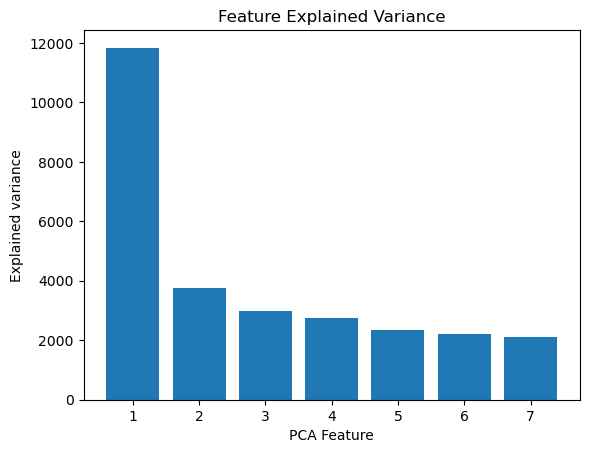

In [73]:
# PCA transform

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca_7 = PCA(n_components=7)
pca_feature = pca_7.fit_transform(x_scaled)

pca_7.explained_variance_

plt.bar(
    range(1,len(pca_7.explained_variance_)+1),
    pca_7.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [89]:
# get pd dataframe of PCA results

df_pca_7 = pd.DataFrame(data=pca_feature, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7'])
df_pca_7['target'] = df_vsd_targets
df_pca_7

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,target
0,-110.717220,60.779486,8.059640,82.625517,-36.906501,-47.316669,-5.036380,control
1,-97.400688,32.133062,97.813272,-46.913588,21.410203,35.855821,23.080267,control
2,-104.181482,-33.150824,-68.228743,-51.599877,-67.925889,29.835082,4.773672,control
3,-78.985828,-11.222932,-56.269746,-10.033390,96.320207,-22.210087,-24.341053,control
4,162.289973,107.485963,-27.778616,-35.819524,-6.116835,3.325485,-13.699840,experimental
5,87.436632,-48.013080,-1.421044,3.409795,4.521987,-42.184918,92.649813,experimental
6,68.645543,-34.829131,-2.834071,76.785471,11.257725,83.570130,-7.711989,experimental
7,72.913068,-73.182544,50.659306,-18.454405,-22.560897,-40.874843,-69.714489,experimental


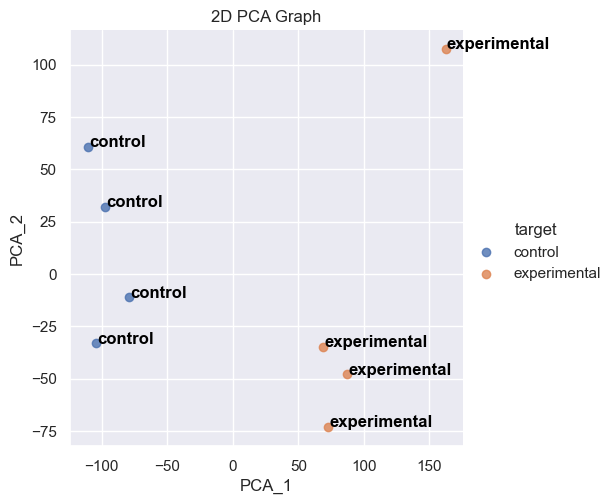

In [113]:
#using Seaborn‘s lmplot, we plot the 2 dimensional principal components on a scatter plot.

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
fig = sns.lmplot(
    x='PCA_1', 
    y='PCA_2', 
    data=df_pca_7.loc[:, ['PCA_1', 'PCA_2', 'target']], 
    hue='target', 
    fit_reg=False, 
    legend=True
    )

for line in range(0,df_pca_7.shape[0]):
     plt.text(df_pca_7['PCA_1'][line]+1, df_pca_7['PCA_2'][line], df_pca_7['index'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

fig.axes[0,0]
 
plt.title('2D PCA Graph')
plt.show()